# Ford GoBike System Dateset

## - Introduction

- Ford GoBike System Dateset is a dateset that contains trip data from lyft's bike service for public use. Variables including, trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, year of birth and gender.
- This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area from  November, 2017 to December, 2017. <a href="https://www.lyft.com/bikes/bay-wheels">Click</a>

## Dataset Overview

> ### Each trip is anonymized and includes:

> - Trip Duration (seconds)
> - Start Time and Date
> - End Time and Date
> - Start Station ID
> - Start Station Name
> - Start Station Latitude
> - Start Station Longitude
> - End Station ID
> - End Station Name
> - End Station Latitude
> - End Station Longitude
> - Bike ID
> - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
###### There are 155686 records and 13 columns

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## - Data Gathering
- Loading the 2017-fordgobike-tripdata.csv into a DataFrame 

In [2]:
# load dataset in dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

## - Data Assessing
- Access 2017-fordgobike-tripdata dataset

In [4]:
# first 3 rows
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer


In [5]:
# last 3 rows
df.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber


In [6]:
df.shape

(519700, 13)

In [25]:
#Checking duplicates rows
df.duplicated().sum()

0

In [26]:
#Checking for missing values using isnull()
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
duration_min               0
start_date                 0
start_hour_of_day          0
start_day_of_week          0
start_month                0
dtype: int64

In [7]:
#info df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


### - Quality Issues
- start_time and end_time is an object
- extract date,day of the week,month,minute,hour from the start_time
- user_type is in string format. Can be transformed into categorical variable

## - Cleaning Data

#### - Define - 1

   - convert data formats for start_time, end_time into datetime

#### - Code

In [8]:
# convert datatype of start_time and end_time from object to datatime
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

#### - Test

In [9]:
#info df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

#### - Define - 2

   - extract date,day of the week,month,minute,hour from the start_time

#### - Code

In [11]:
# Extract minute,day,week,month from the start_time
df['duration_min'] = df['duration_sec']/60

df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')
df['start_day_of_week'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')

#### - Test

In [14]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'duration_min', 'start_date', 'start_hour_of_day', 'start_day_of_week',
       'start_month'],
      dtype='object')

#### - Define - 3

   - user_type is in string format. Can be transformed into categorical variable

#### - Code

In [16]:
# convert datatype of user_type to category
df['user_type'] = df['user_type'].astype('category')

#### - Test

In [17]:
#info df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [19]:
#count start_month
df['start_month'].value_counts()

October      108937
September     98558
November      95612
December      86539
August        83292
July          44073
June           2689
Name: start_month, dtype: int64

In [20]:
#count start_date
df['start_date'].value_counts()

2017-10-26    4682
2017-11-07    4528
2017-11-14    4487
2017-10-24    4473
2017-12-06    4391
              ... 
2017-07-03     600
2017-07-04     558
2017-07-02     523
2017-07-01     475
2017-07-09     433
Name: start_date, Length: 187, dtype: int64

In [28]:
#count user_type
df['user_type'].value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [30]:
# save the cleaned data to csv file
df.to_csv('fordgobike-tripdata_clean.csv',index=None)

In [31]:
#copy dataframe
main = df.copy()

# EDA

### - Univariate Exploration
   - Since most of the values seemed to lie below 4000, I removed the outliers. For this, I computed the Z score of each duration value and remove it if was below 3. That is, remove all values beyond two standard deviations.


##### - 1 - What is the distribution of the number of trips by the start hour of a day?

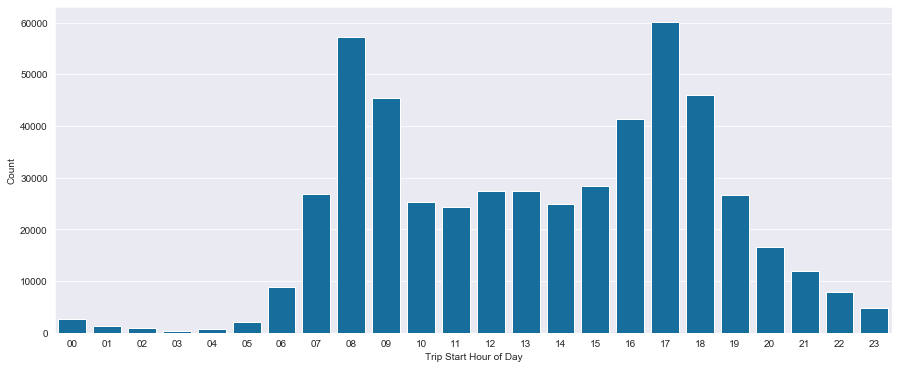

In [38]:
# trip distribution over day hours

plt.rcParams['figure.figsize'] = 15, 6
base_color = sns.color_palette('colorblind')[0]
sns.set_style('darkgrid')

sns.countplot(data=main, x='start_hour_of_day', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

- The most busy hour is 5 PM, second busy hour is 8AM. The busy hours are 7-9 AM in morning and 4PM-6PM in the evening. This time is common commuting time.
- There is clearly a high usage during the peak hours when people go to school or work or they commute from it to home.



##### - 2 - What is the distribution of the number of trips over the start_month?

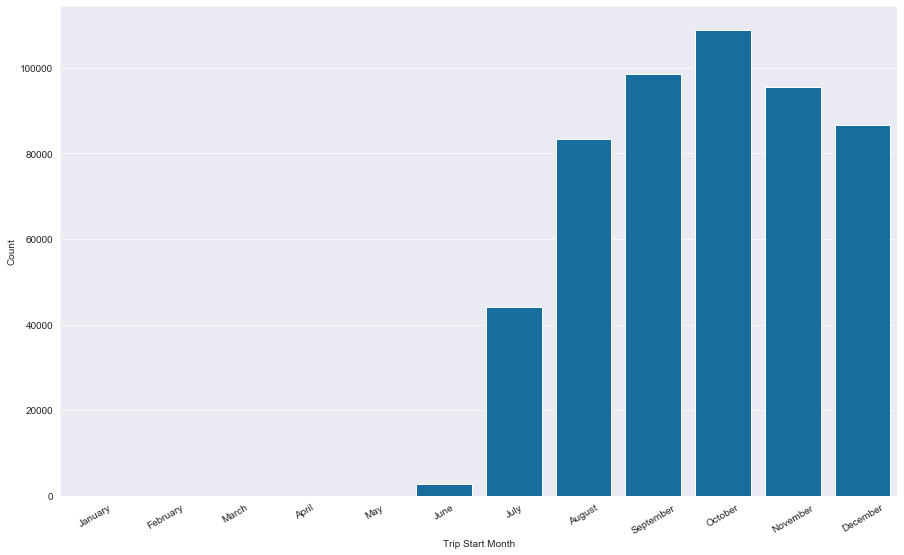

In [58]:
# trip distribution over months
# issue 7: cast 'start_month' to category dtype for easy plotting

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
main['start_month'] = main['start_month'].astype(monthcat)

sns.countplot(data=main, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');

- We can see from above that the distribution of rides incress from August month  
- The trip distribution over day hours peaks around two timeframes, 8am-9am and 17pm-18pm, during typical rush hours. Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri) and primary usage is probably for commuting. from june in 2018, October had the most ride trips compared to the others, but overall it was the most popular during summer time (May-Sept), probably due to the weather in the area.   

#### - The next several plots are around members/users to see what makes up of the riders.



##### - 3 - What is the proportion between different user types?

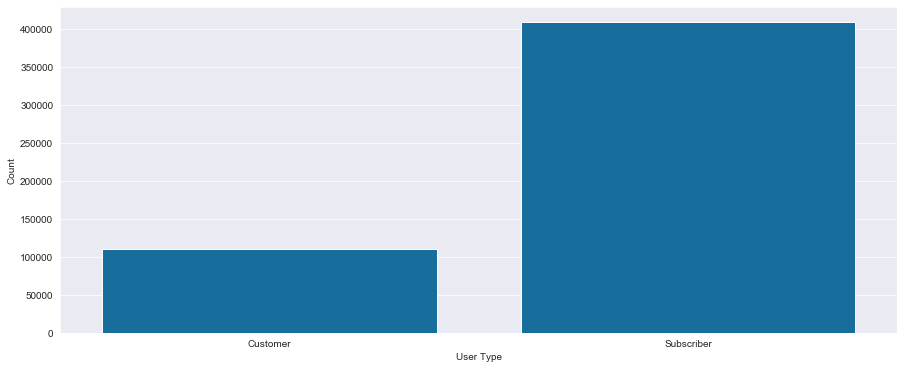

In [44]:
sns.countplot(data=main, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

- Majority of users are Subscribers.
- It makes sense since we saw that many rides could be from people commuting to work or school and these users will probably save money if they subscribe. In general makes sense that people that use the service frequently will prefer subscribing.



##### - 4 - What is the distribution of the number of trips by a day in a week?

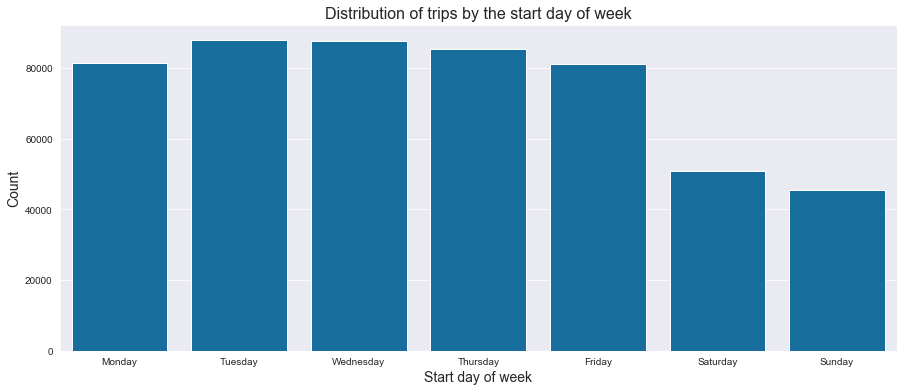

In [45]:
# Visualizing distribution of trips by days

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
main['start_day_of_week'] = main['start_day_of_week'].astype(weekdaycat)

sns.countplot(data=main, x='start_day_of_week', color=base_color)
plt.xlabel('Start day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of trips by the start day of week", fontsize=16);

- People use the bike less on Saturday and Sunday.


- It can clearly be seen that there is a big difference between the rides during the workweek and the rides during the weekend. This makes sense since during the weekends less people have to go to work or study as they do during the workweek.

- Something else to notice is that the frequency of rides during Monday and Friday is less than during Tuesday-Thursday. My guess is that this has to do with the fact that people try to take their vacation days in these days in order to connect those days with the weekend.



##### - 5 - Lets check the bike rides distributed by duration (in sec)

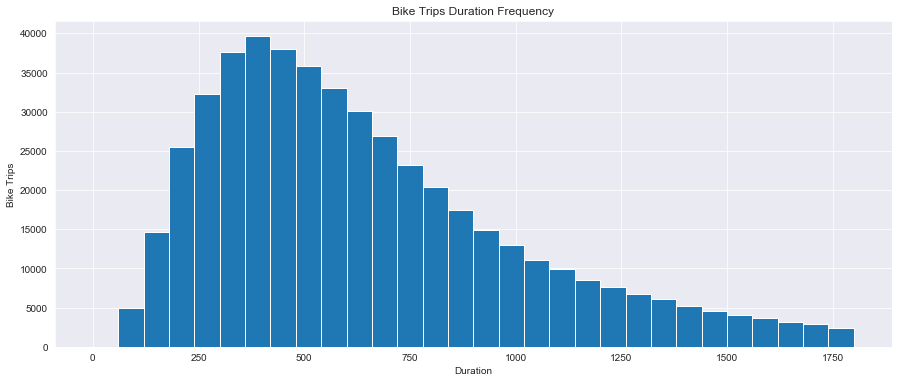

In [46]:
#Plot with the new maximum values. 
bins2 = np.arange(0, 1800+60,60)
main['duration_sec'].plot( kind = 'hist', bins = bins2)
plt.xlabel('Duration');
plt.ylabel('Bike Trips');
plt.title('Bike Trips Duration Frequency');

- Looking to distribution of plot, it's clearly skewed to right, and this shows the consumer behavior of duration seconds aren't too long

### Insights from univariate data exploration

  - The most busy hour is 5 PM, second busy hour is 8AM. The busy hours are 7-9 AM in morning and 4PM-6PM in the evening. This time is common commuting time.
  - On Saturdays and Sundays people tend to use the bike service less
  - Majority of the useres were subscribers.

## - Bivariate Exploration

#### - 1 - Is there any difference in weekly usage between type of users?

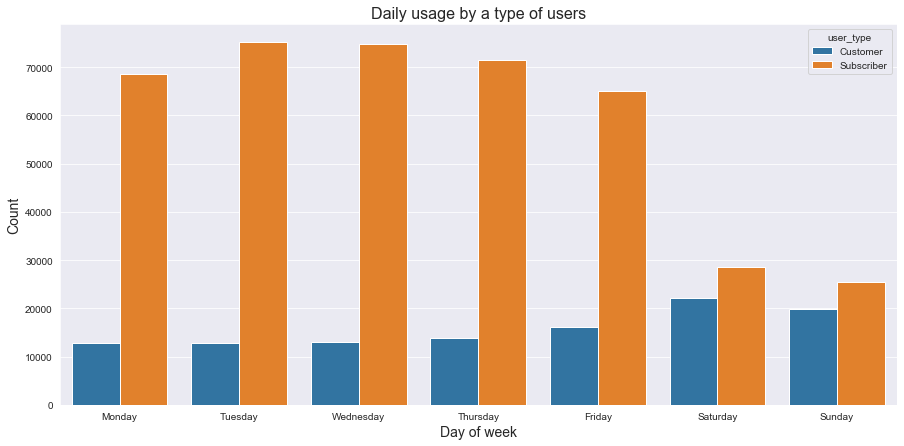

In [49]:
# Daily usage by a user type
plt.rcParams['figure.figsize'] = 15, 7
sns.countplot(data=main, x='start_day_of_week', hue='user_type');
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Daily usage by a type of users", fontsize=16);

- Customers more tend to use the service during weekends, while subscribers prefer to cycle from Monday to Friday

#### - 2 - Is there any difference in Hourly usage between type of users?

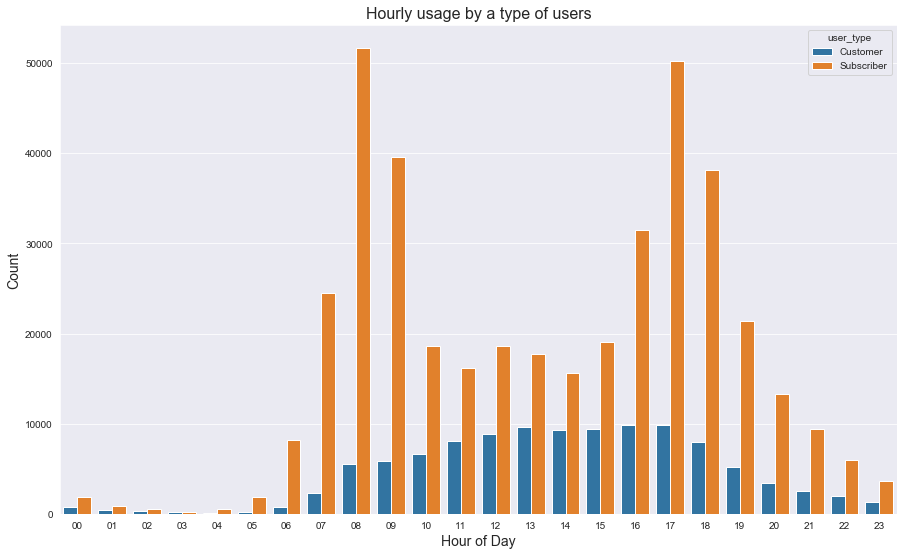

In [50]:

# Hourly usage by a user type
plt.rcParams['figure.figsize'] = 15, 9
sns.countplot(data=main, x='start_hour_of_day', hue='user_type');
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Hourly usage by a type of users", fontsize=16);

- Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use bike at rush a hours.

#### - 3 - Does the average duration depend on if a user is a subscriber or customer?

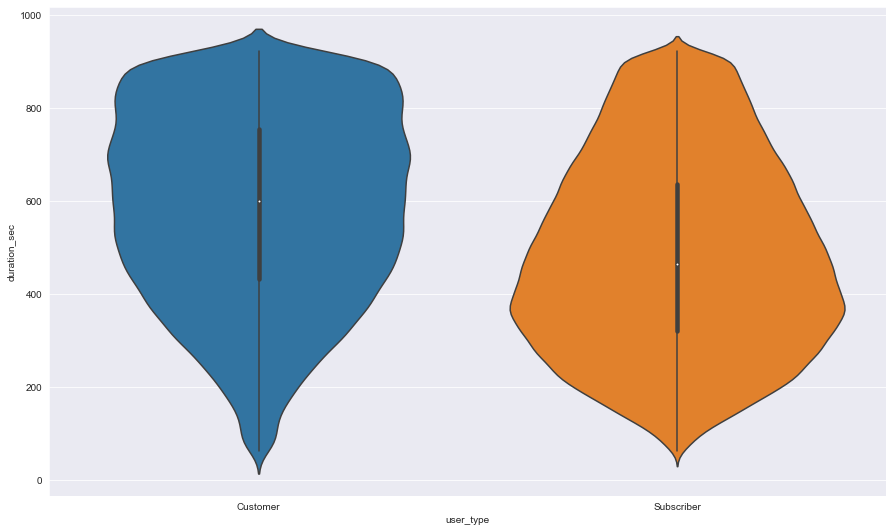

In [51]:
sns.violinplot(data=main[main.duration_sec<=923],x='user_type',y='duration_sec');

- Seems like duration is higher if the user type is a one time customer. However, this might also be dependent on the distance between locations, so an average should be taken over location to location and plotted

#### - 4 - Is there any difference in Monthly usage between type of users?

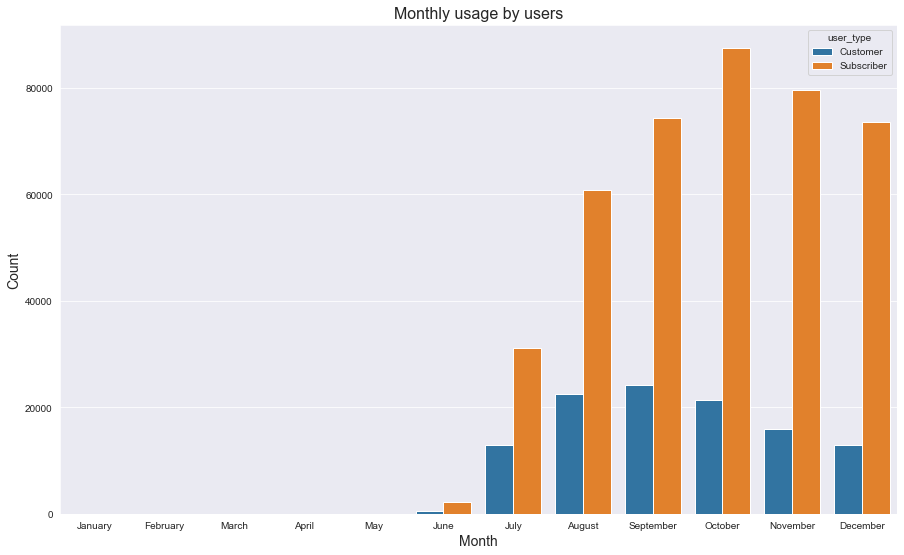

In [53]:
# User Type and Month
plt.rcParams['figure.figsize'] = 15, 9
sns.countplot(data=main, x='start_month', hue='user_type');
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Monthly usage by users", fontsize=16);

- Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use more bike in October month.

## Insights from bivariate data exploration
 - Customers more tend to use the service during weekends, while subscribers prefer to cycle from Monday to Friday
 - Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use bike at rush a hours.
 - Both customers and subscribers have similar pattern. This graph proves that customers and subscribers tend to use more bike in october month.

## Multivariate Exploration
   - Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

#### - 1 - Here are some of the combinations we shall be exploring :
 - User Type, start_day_of_week and Duration in Seconds
 - User Type, start_hour_of_day and Duration in Seconds

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


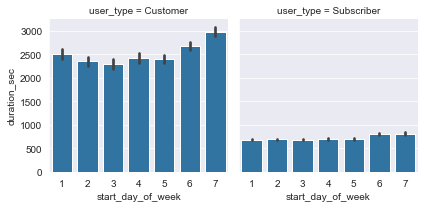

In [54]:
g = sns.FacetGrid(data=main, col='user_type')
days = [ '1', '2', '3', '4', '5', '6', '7']
g.map(sns.barplot,'start_day_of_week','duration_sec');
g.set_xticklabels(days)
plt.tight_layout();

- Trip duration for customers is larger than for subscribers. Also, it is clear that subscribers spend less time in a trip than customers. Both of the user types have an increasing trend for the average time for a trip by the end of a week.

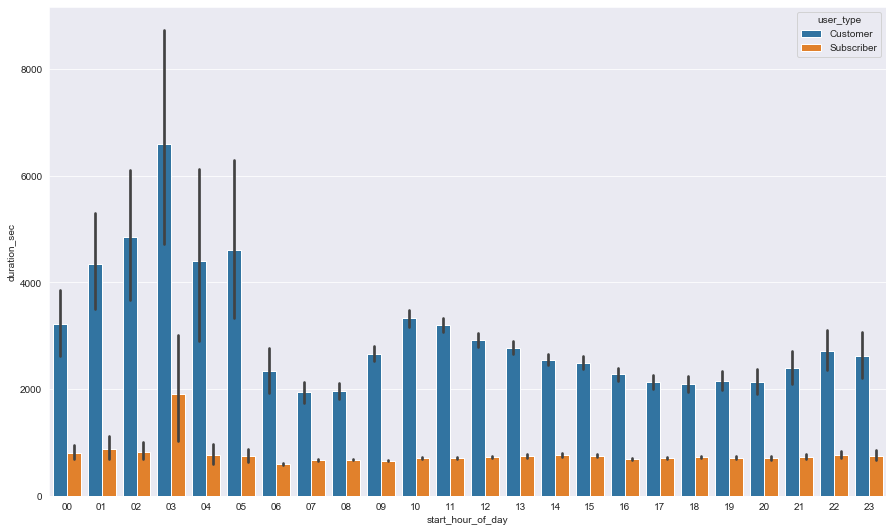

In [56]:
sns.barplot(data=main, x='start_hour_of_day',y='duration_sec',hue='user_type');

#### - 2 - How does the hourly usage vary during a week for customers and subscribers?

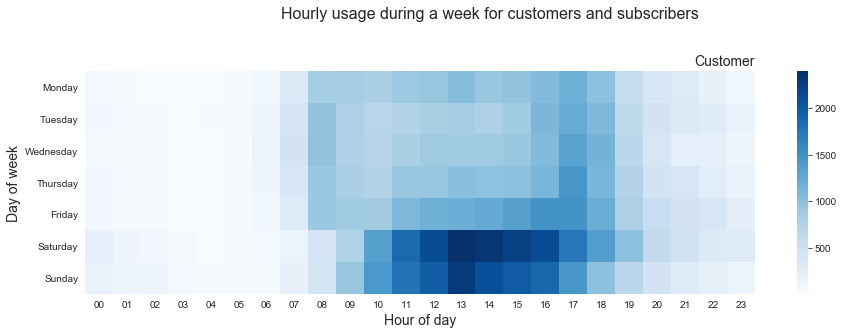

In [59]:
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16)

plt.subplot(2, 1, 1)
customers = main.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sns.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);



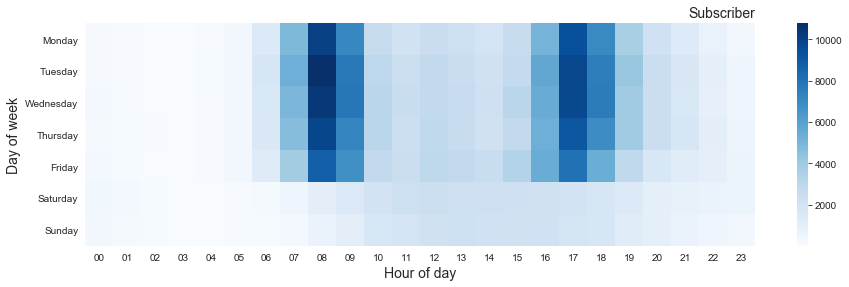

In [60]:
plt.subplot(2, 1, 2)
subscribers = main.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sns.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

- The heatmaps shows clearly very different usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.  

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Sure. Definitely each of these graphs reinforces the general hypothesis that customers are more like recreational users and suscribers tend to be people that use them to go to work or school. But the last (multivariate explorations) help us get even more detail about the patterns of use and the differences between customers and suscribers.

## Were there any interesting or surprising interactions between features?

- Sure. For both types of users the distribution of rides during the weekdays depends a lot on the hour of the day and the month of the year.As expected, trip data seems to be most during the 9 am to 6 pm timeline, across stations with high traffic.


## Conclusion

  > There is a difference in usage patterns by day of week and hours for customers and subscribers.
  > Relationship between User Type and Trip Duration, indicating that regular users take lesser time to complete rides.